In [1]:
# Import useful packages
import pandas as pd 
pd.set_option('max_rows', 10) 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# import and print data
# data = pandas.read_csv("soil_observations.csv") # requires file to be loaded in the directory
data = pd.read_csv("kc_house_data.csv") #reads the comma separated variables(data) and separates it 
data = data.dropna() #removes the 'nan' from the dataset
data.head()  #prints the first five columns of the dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
#Some parts were extracted from CS51 session 2.1
def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x]) 
    Y = data[column_y]
    #makes the line of best fit 
    global regressionmodel  #defines the regressionmodel as a global function
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)  #extracts the rsquared value
    slope = round(regressionmodel.params[1],3)  #extracts the slope
    intercept = round(regressionmodel.params[0],3)  #extracts the intercept from the model
    

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1),'\n' #makes a scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) #makes a residual plot
    plt.title('Sacatterplot of the variables')
    ax2.set(ylabel='Residuals') 
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.title('Sacatterplot of residuals')
    ax2.yaxis.set_label_position("right")
    plt.figure() # plots the histogram
    plt.title('Histogram distribution of residuals')


    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)
    
    # QQ plot:
    
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    


R-squared =  0.493
Regression equation: price =  280.624 * sqft_living +  -43580.743


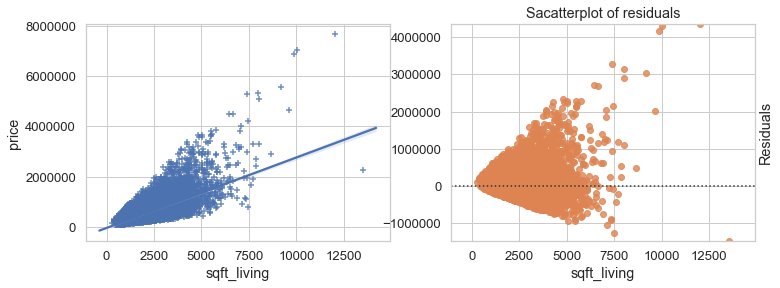

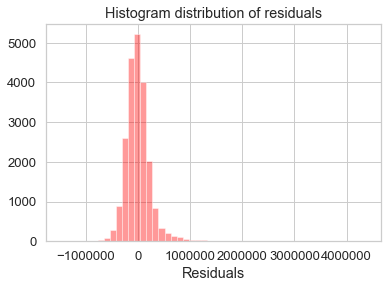

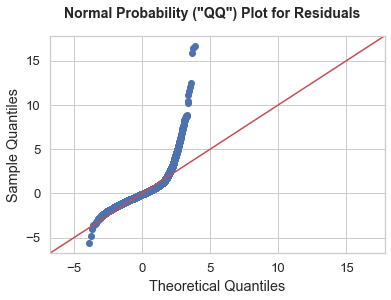

In [17]:
regression_model('sqft_living','price') #takes in the variables and plots the graphs


In [5]:
price =[]  #initializes an empty list for price
for i in range(len(data["price"])): #sets a loop for the number of elements in grpriade column
        price.append(data["price"][i]) #adds the number to the price list

living =[]  #initializes an empty list for living
for i in range(len(data["sqft_living"])): #sets a loop for the number of elements in livingroom column
        living.append(data["sqft_living"][i]) #adds the number to the price list


In [6]:
#Extracted from CS51 Session 2.1
# Let's run an Ordinary Least Squares (OLS) regression analysis with a stats package

# TODO: Input *DIFFERENT* variables of your choice in the predictor_vars list
# TODO: Also, try adding *MORE* predictor variables
syndata = data.fillna(data.mean())

predictor_vars = ['sqft_living','price']

X = syndata[predictor_vars]
X = statsmodels.add_constant(X) # if excluded, the intercept would default to 0
y = syndata['price']

model = statsmodels.OLS(y, X).fit()  #stores the line of best fit in a variable 'model'

regressionmodel.summary() #outputs the regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 01 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:51:22   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#code was made based on the formula for pearson coefficient

import math 
def average(x):  #defines a function that finds the mean of the variables
    return float(sum(x)) / len(x)  #returns the output and converts to float

def pearson_def(x, y):  #defines a function to find the pearsons coefficient
    n = len(x)  #stores the enght of the variable as n
    avg_x = average(x)  #finds the mean of the predictor
    avg_y = average(y)  #finds the mean of the response
    diffprod = 0  #initiates the product of the mean differences
    xdiff2 = 0  #initiates the product of the square difference for x
    ydiff2 = 0    #initiates the product of the square difference for y
    for i in range(n):  #starts a loop for the number of elements in the list
        xdiff = x[i] - avg_x   #finds the difference of an x datapoint and the mean
        ydiff = y[i] - avg_y   #finds the difference of a y datapoint and the mean
        diffprod += xdiff * ydiff  #finds the summation of the product of mean difference
        xdiff2 += xdiff * xdiff  #finds the summation of the product of square difference of x
        ydiff2 += ydiff * ydiff  # finds the summation of the product of square difference of y

    return diffprod / math.sqrt(xdiff2 * ydiff2)  # returns the quotients of the difference of product  
    #and the square root of the product of square difference
print('Pearson\'s r is ', pearson_def(price,living)) #outputs the pearson's coefficient



Pearson's r is  0.7020350546118009


In [8]:

import scipy.stats as stats #imports the stats module from the scipy library
def hypothesis_test(data1, data2, tails): #defines a function that takes in the
    #lists of freshmen and seniors as well as the tails
    n = len(price)
   #finds the number of sample size in the list of freshmen

    S_price = np.std(data1) # Bessel’s correction: using n-1 in the denominator
    S_living = np.std(data2)# Bessel’s correction: using n-1 in the denominator
    slope = 280.6236  #stores the slope of the regression model
    R_squared = 0.493  #stores the r-squared of the regression model
    SE = np.sqrt((1 - R_squared)/(n-2)) * S_price/S_living #finds the standard error of the model 
    print('Standard Error =',SE)
    #by getting the weighted standard deviation
    Tscore = np.abs((slope - 0))/SE #finds the Tscore because the population standard deviation is not given
    df = n-2  #conservatively estimates the degree of freedom
    pvalue = tails * stats.t.cdf(-Tscore,df) #finds the pvalue and multiplies by number of tails
    print('T score =',Tscore)
    print('p =', pvalue)
    
hypothesis_test(price, living, 2) #prints the t score,pvalue and effect size 

Standard Error = 1.9361183084703697
T score = 144.94134928237247
p = 0.0
